In [15]:
from financetoolkit import Toolkit
from financetoolkit import Discovery
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
# Set the environment variable with the API Key
%env API_KEY=FNwmge1NKGlZxiqRKw1ra2Ed2NK0VGVc

env: API_KEY=FNwmge1NKGlZxiqRKw1ra2Ed2NK0VGVc


In [17]:
import os

api_key = os.getenv('API_KEY')

Reference material: https://www.jeroenbouma.com/projects/financetoolkit/discovery-module

In [13]:
# Sample Code Below to access API
# 
toolkit = Toolkit(["AAPL", "TSLA"], api_key="FINANCIAL_MODELING_PREP_KEY")
#toolkit = Toolkit(["VHT",], api_key="FINANCIAL_MODELING_PREP_KEY")


# Get Performance Metric Results
# Summary documentation here: github.com/jerbouma/FinanceToolkit/tree/main
# CAPM definition: https://www.jeroenbouma.com/projects/financetoolkit/docs/performance#get_capital_asset_pricing_model

print(dir(toolkit))


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_analyst_estimates', '_analyst_estimates_growth', '_api_key', '_balance_sheet_statement', '_balance_sheet_statement_generic', '_balance_sheet_statement_growth', '_benchmark_ticker', '_cash_flow_statement', '_cash_flow_statement_generic', '_cash_flow_statement_growth', '_convert_currency', '_currencies', '_daily_exchange_rate_data', '_daily_historical_data', '_daily_risk_free_rate', '_daily_treasury_data', '_dividend_calendar', '_earnings_calendar', '_end_date', '_esg_scores', '_fmp_plan', '_historical', '_historical_source', '_historical_statistics', '_income_statement', '_income_statement_generic', '_income_statement_growth', '_i

You have entered an invalid API key from FinancialModelingPrep. Obtain your API key for free and get 15% off the Premium plans by using the following affiliate link.
This also supports the project: https://www.jeroenbouma.com/fmp
No data found for the following tickers: AAPL, TSLA


NameError: name 'get_profile' is not defined

In [14]:
# your_script.py
import os
import pandas as pd
from financetoolkit import fundamentals_model

# Get the API key from environment variables
#api_key = os.getenv('API_KEY')

# Define the tickers you want to get the profile for
tickers = ["AAPL", "TSLA"]
#tickers = ["VOO",]

# Call the get_profile function
profile_df, no_data = fundamentals_model.get_profile(tickers, api_key)

# Print the result
print(profile_df)

# If you want to access specific columns like 'Industry' and 'Sector'
if not profile_df.empty:
    industry = profile_df.loc['Industry']
    sector = profile_df.loc['Sector']
    print('Industry:', industry)
    print('Sector:', sector)


                                                                    AAPL  \
Symbol                                                              AAPL   
Price                                                             230.54   
Beta                                                               1.244   
Average Volume                                                  68778790   
Market Capitalization                                      3535123414000   
Last Dividend                                                          1   
Range                                                      164.08-233.08   
Changes                                               2.9699999999999998   
Company Name                                                  Apple Inc.   
Currency                                                             USD   
CIK                                                               320193   
ISIN                                                        US0378331005   
CUSIP       

In [18]:
# your_script.py
import os
import pandas as pd
from financetoolkit import fundamentals_model

# Get the API key from environment variables
#api_key = os.getenv('API_KEY')

# Define the tickers you want to get the profile for
#tickers = ["AAPL", "TSLA"]
tickers = ["VOO",]

# Call the get_profile function
profile_df, no_data = fundamentals_model.get_profile(tickers, api_key)

# Print the result
print(profile_df)

# If you want to access specific columns like 'Industry' and 'Sector'
if not profile_df.empty:
    industry = profile_df.loc['Industry']
    sector = profile_df.loc['Sector']
    print('Industry:', industry)
    print('Sector:', sector)


                                                                     VOO
Symbol                                                               VOO
Price                                                             500.33
Beta                                                                   1
Average Volume                                                   4472119
Market Capitalization                                      1179737929479
Last Dividend                                          6.619999999999999
Range                                                       375.95-519.4
Changes                                                             5.55
Company Name                                     Vanguard 500 Index Fund
Currency                                                             USD
CIK                                                                36405
ISIN                                                        US9229083632
CUSIP                                              

In [114]:
"""Profile Model"""
__docformat__ = "google"

import pandas as pd

from financetoolkit.helpers import get_financial_data


def get_profile(api_key: str, query: str) -> pd.DataFrame:
    """
    Get a list of company profile attributes defined in the financial model database.

    Args:
        api_key (str): the API key from Financial Modeling Prep.
        query (str): The query to search for.

    Returns:
        pd.DataFrame: DataFrame of instruments.
    """
    #https://financialmodelingprep.com/api/v3/profile/AAPL?apikey=FNwmge1NKGlZxiqRKw1ra2Ed2NK0VGVc
    url = f"https://financialmodelingprep.com/api/v3/profile/{query}?&apikey={api_key}"
    print('api key: ', api_key)
    print("URL being used: ", url)
    profile_query = get_financial_data(url=url)
    """
    instruments_query = instruments_query.rename(
        columns={
            "symbol": "Symbol",
            "name": "Name",
            "currency": "Currency",
            "stockExchange": "Exchange",
            "exchangeShortName": "Exchange Code",
        }
    )

    instruments_query = instruments_query.set_index("Symbol")
    """
    return profile_query

In [115]:
print(api_key)
print(type(api_key))
foo = get_profile(api_key, 'AAPL')

FNwmge1NKGlZxiqRKw1ra2Ed2NK0VGVc
<class 'str'>
api key:  FNwmge1NKGlZxiqRKw1ra2Ed2NK0VGVc
URL being used:  https://financialmodelingprep.com/api/v3/profile/AAPL?&apikey=FNwmge1NKGlZxiqRKw1ra2Ed2NK0VGVc


In [116]:
print(foo.keys())
print(type(foo))
print(foo['sector'].iloc[0])
print(foo['industry'].iloc[0])

Index(['symbol', 'price', 'beta', 'volAvg', 'mktCap', 'lastDiv', 'range',
       'changes', 'companyName', 'currency', 'cik', 'isin', 'cusip',
       'exchange', 'exchangeShortName', 'industry', 'website', 'description',
       'ceo', 'sector', 'country', 'fullTimeEmployees', 'phone', 'address',
       'city', 'state', 'zip', 'dcfDiff', 'dcf', 'image', 'ipoDate',
       'defaultImage', 'isEtf', 'isActivelyTrading', 'isAdr', 'isFund'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Technology
Consumer Electronics


In [109]:
# List of funds
funds_etrade = ['BND', 'EMB', 'GLD', 'GOOG', 'JNK', 'NVDA', 'QISOX', 'RWO', 'VBR', 'VEU', 'VSS', 'VTI']
funds_schwab = ['MSFT', 'SCHE', 'AKREX', 'TWEIX', 'FKAIX', 'FCPIX', 'FRIRX', 'MGIAX', 'PDBZX', 'PRGMX', 'VLIFX']
toolkit = Toolkit(funds_schwab, api_key=api_key)

In [104]:
ETRADE_7443_JT_QTY = {}
ETRADE_FUND_8259_QTY = {'BND':390.547, 'EMB':73.92, 'GLD':164.552, 'GOOG':1000, 'JNK':76.097, 'NVDA':2500, 'QISOX':631.264, 'RWO':140.155, 'VBR':632.752, 'VEU':2218.599, 'VSS':219.599, 'VTI':1163.631}
SCHWAB_FUND_QTY = ['MSFT', 'SCHE', 'AKREX', 'TWEIX', 'FKAIX', 'FCPIX', 'FRIRX', 'MGIAX', 'PDBZX', 'PRGMX', 'VLIFX']
AGGRESSIVE_FUND_QTY = ['MSFT', 'AAPL', 'NVDA', 'AMZN', 'GOOG', 'TSLA', 'META']
toolkit = Toolkit(AGGRESSIVE_FUND_QTY, api_key=api_key)

In [110]:
# Initialize empty DataFrames to store the metrics
performance_df = pd.DataFrame()
volatility_df = pd.DataFrame()
beta_df = pd.DataFrame()
alpha_df = pd.DataFrame()
capm_df = pd.DataFrame()

In [111]:
alpha_df = toolkit.performance.get_alpha()
sharpe_df = toolkit.performance.get_sharpe_ratio()
beta_df = toolkit.performance.get_beta()

The following tickers acquired historical data from FinancialModelingPrep: MSFT, SCHE, AKREX, TWEIX, FCPIX, PDBZX, PRGMX, SPY, VLIFX
The following tickers acquired historical data from YahooFinance: FRIRX, FKAIX, MGIAX


Alpha:

Definition: Alpha measures the performance of an investment relative to a market index or benchmark. It represents the excess return of the investment compared to the benchmark.
What to look for: Positive alpha indicates that the investment has outperformed the benchmark, while negative alpha indicates underperformance. Higher positive alpha is generally better, as it suggests the investment is providing a return above what is predicted by its beta.


In [68]:
capm_df = toolkit.performance.get_capital_asset_pricing_model()

In [106]:
print(alpha_df)

        MSFT    AAPL    NVDA    AMZN    GOOG    TSLA    META
Date                                                        
2014  0.1409  0.2717  0.1393 -0.3564 -0.1953  0.3439  0.2929
2015  0.2145 -0.0427  0.6588  1.1649  0.4332  0.0666  0.3292
2016  0.0309  0.0052  2.1499 -0.0105 -0.1028 -0.2294 -0.0208
2017  0.1903  0.2673  0.6042  0.3425  0.1385  0.2397  0.3167
2018  0.2536 -0.0082 -0.2633  0.3301  0.0354  0.1146 -0.2114
2019  0.2633  0.5773  0.4582  -0.082  -0.021 -0.0553  0.2535
2020   0.242  0.6398  1.0385  0.5793  0.1268  7.2505  0.1476
2021  0.2375  0.0592  0.9685 -0.2635  0.3645  0.2103  -0.056
2022 -0.0984 -0.0822 -0.3208 -0.3144 -0.2049 -0.4685 -0.4604
2023  0.3202  0.2283  2.1278  0.5471  0.3266  0.7555  1.6797
2024  0.0634 -0.0153  1.3148  0.1539  0.1632 -0.2317    0.28


In [70]:
print(capm_df)

        MSFT    AAPL    NVDA    AMZN    GOOG    TSLA
Date                                                
2014  0.1317  0.1178  0.1642  0.1879   0.168  0.2414
2015  0.0097  0.0107  0.0104   0.011  0.0114  0.0108
2016  0.1417  0.1209  0.1493  0.1298  0.1154  0.1409
2017  0.2721  0.2839  0.4381  0.2753  0.2664  0.2855
2018 -0.0777 -0.0646 -0.1102 -0.0908 -0.0724 -0.0726
2019  0.3974  0.4727  0.6861  0.4076  0.3939  0.4051
2020  0.2092  0.2108   0.247  0.1315  0.1792  0.2318
2021  0.3311   0.376  0.5621  0.3007  0.3584  0.5327
2022 -0.2434 -0.2486 -0.4473 -0.3218 -0.2555 -0.3451
2023     0.3  0.2872  0.4895  0.3797  0.3533  0.5401
2024  0.1976  0.1654  0.3468    0.21  0.1847   0.197


In [12]:
print(sharpe_df)

        MSFT    SCHE   AKREX   TWEIX   FKAIX   FCPIX    FRIRX   MGIAX  \
Date                                                                    
2014 -2.0014 -2.4662 -3.1393 -4.5257     NaN -3.6109  -8.6295  -4.074   
2015 -1.1427 -1.6659 -2.3765 -2.9041     NaN -2.4774  -5.7233 -2.4677   
2016 -1.2057 -1.2894 -1.8878 -2.4746  -1.349 -1.8414  -3.6684 -1.8698   
2017 -2.3407 -3.0301 -4.4996 -6.2569 -2.9317 -4.8074  -9.9193  -5.127   
2018  -1.573 -2.2371 -2.7449 -3.7856 -2.2454 -2.9854  -8.2396 -3.7205   
2019 -1.5112 -2.1267 -2.6815 -3.0933 -2.0137 -2.5604  -4.5924 -2.8288   
2020  -0.254 -0.3848 -0.3787 -0.4569 -0.3524 -0.4274   -0.553  -0.511   
2021 -0.9431 -1.2636 -1.4336 -2.3064  -0.956 -1.4171  -3.6254 -1.8656   
2022 -1.3186 -1.9075 -1.7009 -2.5689 -1.4171 -1.7056  -3.2653 -2.0015   
2023 -2.2772 -3.7579 -3.8132 -5.3268 -3.1347 -3.9988  -6.0723 -4.1488   
2024 -3.3459  -5.154 -4.9695 -7.9429  -3.906 -5.2849 -10.3395 -5.6594   

        PDBZX    PRGMX   VLIFX  
Date             

Sharpe Ratio:

Definition: The Sharpe ratio measures the performance of an investment relative to its risk, specifically its volatility. It is calculated as the difference between the investment's return and the risk-free rate, divided by the investment's standard deviation (volatility).
What to look for: A higher Sharpe ratio indicates better risk-adjusted returns. This means that for the amount of risk taken, the investment is providing a higher return. Generally, a Sharpe ratio above 1 is considered good, above 2 is very good, and above 3 is excellent.

A negative Sharpe ratio indicates that the return of an investment is less than the risk-free rate, even after accounting for its volatility. Here’s what you should consider when encountering very low or negative Sharpe ratios, such as -7 or -10:

Understanding Negative Sharpe Ratios:

Definition: A negative Sharpe ratio occurs when the risk-free rate of return exceeds the portfolio's or investment's return. The formula for the Sharpe ratio is 
(
𝑅
𝑝
−
𝑅
𝑓
)
/
𝜎
𝑝
(R 
p
​
 −R 
f
​
 )/σ 
p
​
 , where 
𝑅
𝑝
R 
p
​
  is the return of the portfolio, 
𝑅
𝑓
R 
f
​
  is the risk-free rate, and 
𝜎
𝑝
σ 
p
​
  is the standard deviation of the portfolio’s excess return.
Implication: A negative Sharpe ratio suggests that the investment has underperformed relative to a risk-free asset (such as Treasury bonds) after adjusting for its risk (volatility).
Causes of Extremely Low or Negative Sharpe Ratios:

Poor Performance: The investment has significantly underperformed, resulting in returns that are far below the risk-free rate.
High Volatility: The investment may have high volatility without corresponding high returns, increasing the standard deviation term in the Sharpe ratio formula.
Market Conditions: Certain market conditions or economic downturns can result in negative returns across a broad range of investments.
What to Look For:

Risk vs. Reward: Investments with extremely negative Sharpe ratios are generally not attractive as they suggest poor risk-adjusted performance. They indicate that the investor is taking on volatility without being compensated with adequate returns.
Compare with Benchmarks: Assess how these investments compare to benchmarks or other similar investments. If all similar investments have negative Sharpe ratios due to market conditions, the specific investment might not be underperforming relatively.
Time Periods: Check if the negative Sharpe ratio is an anomaly for a specific period or if it is consistent over time. Temporary negative ratios can occur during periods of market stress or transition.
Diversification: Consider how this investment fits into your overall portfolio. If it’s one of many and its risk is offset by other, better-performing investments, the overall impact might be mitigated.
Actions to Take:

Reevaluate Investment: Investments with highly negative Sharpe ratios should be carefully evaluated. Assess whether the poor performance is expected to continue or if it’s a temporary situation.
Risk Management: Consider reducing exposure to highly volatile or underperforming investments. Diversify to spread out risk.
Investment Strategy: Align your investment choices with your risk tolerance and investment goals. High volatility investments should generally provide returns that justify their risk, otherwise, safer investments might be a better option.
In summary, extremely low or negative Sharpe ratios, such as -7 or -10, are red flags indicating poor risk-adjusted performance. They suggest that the investment is not providing adequate returns for the level of risk taken and should be reviewed critically within the context of your overall investment strategy.


Beta:

Definition: Beta measures the volatility or systemic risk of an investment in comparison to the market as a whole. A beta of 1 means the investment's price moves with the market. A beta greater than 1 indicates higher volatility than the market, and a beta less than 1 indicates lower volatility.
What to look for: If you are risk-averse, you might prefer investments with a beta less than 1, as they are less volatile than the market. If you are willing to take on more risk for potentially higher returns, you might look for investments with a beta greater than 1. Comparing beta with the returns can help you understand if the return justifies the risk (volatility) you are taking.

In [50]:
print(beta_df)
beta_df.index = beta_df.index.to_timestamp()
print(beta_df)

       MSFT   SCHE  AKREX  TWEIX  FKAIX  FCPIX  FRIRX  MGIAX   PDBZX   PRGMX  \
Date                                                                           
2014 0.9744 0.9359 0.9907 0.6883    NaN 0.7864  0.157 0.5983 -0.0742 -0.0738   
2015 1.2457 1.0546 0.8579  0.707    NaN 0.7395  0.219 0.6577 -0.0623 -0.0405   
2016 1.2278 1.3067 1.0136 0.7687 1.2691 0.9638 0.2865 0.9105 -0.0512 -0.0266   
2017 1.2809 1.0647  0.828 0.7349 1.3677 0.6534 0.1447 0.5379 -0.1374 -0.0824   
2018 1.4397 0.9224 0.8991 0.6607 0.9809 0.7678 0.1645 0.5824 -0.0308 -0.0259   
2019 1.2897 0.8479 0.7155 0.6572 1.0355 0.7462 0.1392 0.6085 -0.1179  -0.031   
2020  1.149 0.8527 0.9438  0.851 0.8601  0.792 0.5081 0.6597  0.0124 -0.0079   
2021 1.1613  0.808 0.9979  0.582 1.2413 0.9196 0.2862 0.6899 -0.0112  0.0033   
2022 1.2788 0.6497 1.0255 0.5512  1.195 0.9951 0.2989 0.7882  0.0724  0.1268   
2023 1.1723 0.7361 0.9746 0.5598 1.1106 0.8253 0.3716 0.6853  0.0802  0.1082   
2024 1.3885 0.6575  0.938 0.3198 1.1901 

In [112]:
beta_df.index = beta_df.index.to_timestamp()
alpha_df.index = alpha_df.index.to_timestamp()
sharpe_df.index = sharpe_df.index.to_timestamp()

In [33]:
beta_foo = beta_df.reset_index()
beta_foo_too = beta_foo.rename(columns={'index': 'Date'})
beta_foo_too_melted = beta_foo_too.melt(id_vars='Date', var_name='Investment', value_name='Beta')
print(beta_foo_too_melted)

          Date Investment   Beta
0   2014-01-01       MSFT 0.9742
1   2015-01-01       MSFT 1.2458
2   2016-01-01       MSFT 1.2278
3   2017-01-01       MSFT 1.2806
4   2018-01-01       MSFT 1.4397
..         ...        ...    ...
116 2020-01-01      VLIFX 0.9702
117 2021-01-01      VLIFX  0.982
118 2022-01-01      VLIFX 0.9111
119 2023-01-01      VLIFX 0.9542
120 2024-01-01      VLIFX 0.9898

[121 rows x 3 columns]


In [34]:
beta_melted = beta_df.reset_index().rename(columns={'index':'Date'}).melt(id_vars='Date', var_name='Investment', value_name='Beta')

In [37]:
print(beta_melted)
# Plotly strip plot
fig = px.strip(beta_melted, x='Investment', y='Beta', color='Metric', stripmode='overlay', 
               hover_data=['Date'], title='Alpha and Beta for Each Investment Over Time')

fig.update_layout(xaxis_title='Investment', yaxis_title='Value', legend_title='Metric', xaxis_tickangle=45)

fig.show()


          Date Investment   Beta
0   2014-01-01       MSFT 0.9742
1   2015-01-01       MSFT 1.2458
2   2016-01-01       MSFT 1.2278
3   2017-01-01       MSFT 1.2806
4   2018-01-01       MSFT 1.4397
..         ...        ...    ...
116 2020-01-01      VLIFX 0.9702
117 2021-01-01      VLIFX  0.982
118 2022-01-01      VLIFX 0.9111
119 2023-01-01      VLIFX 0.9542
120 2024-01-01      VLIFX 0.9898

[121 rows x 3 columns]


ValueError: Value of 'color' is not the name of a column in 'data_frame'. Expected one of ['Date', 'Investment', 'Beta'] but received: Metric

Understanding Volatility and Return Matching:

Consistency: Check if the return of the investment is consistent with its level of volatility. For example, an investment with high beta (high volatility) should ideally offer higher returns to compensate for the higher risk. Similarly, low beta investments should offer lower but more stable returns.
Risk-Adjusted Performance: Use the Sharpe ratio to assess if the returns are sufficient for the level of risk taken. An investment with high returns but also high volatility might not be as attractive if the Sharpe ratio is low.
Comparing Metrics: Compare these metrics across different investments. For instance, an ETF with a higher Sharpe ratio and positive alpha might be a better choice compared to one with lower Sharpe ratio and negative alpha, even if both have similar betas.
By analyzing these metrics together, you can get a comprehensive view of an investment's performance relative to its risk and benchmark, helping you make more informed investment decisions.








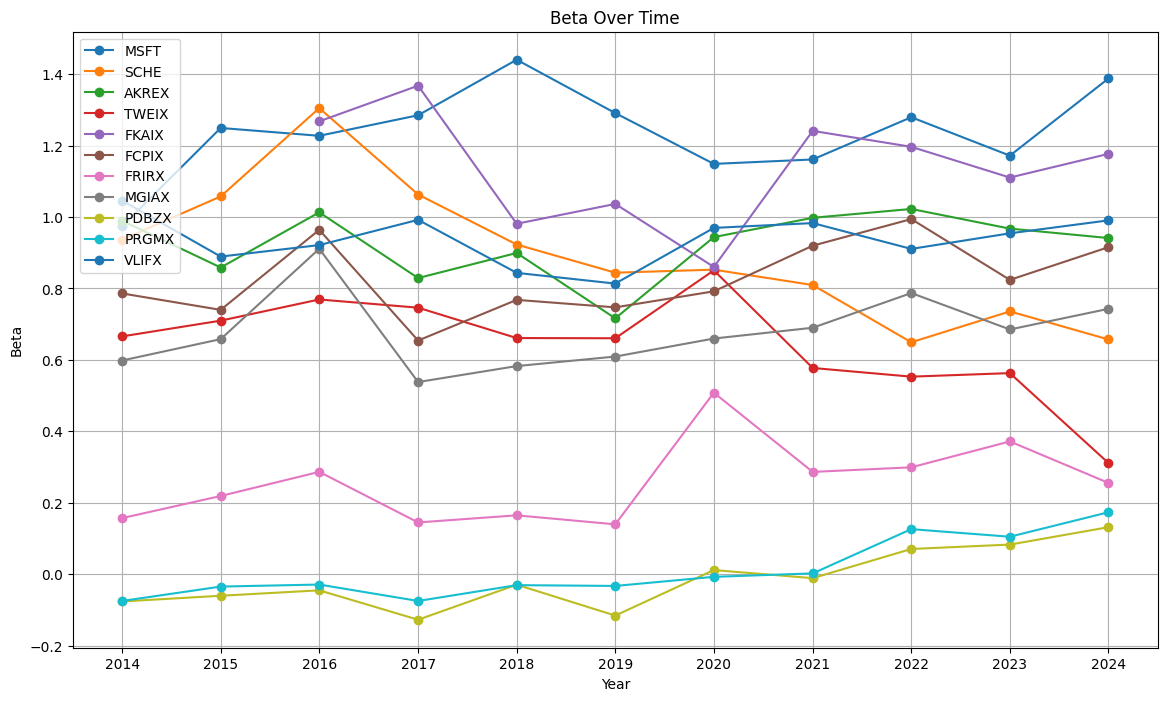

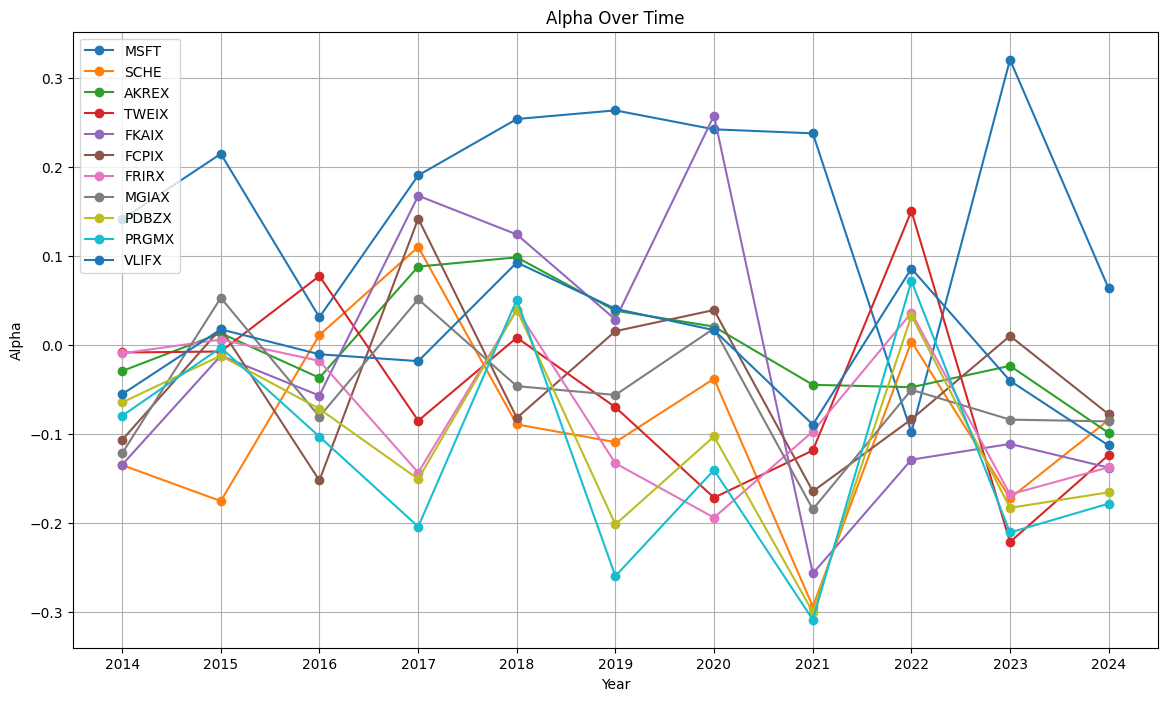

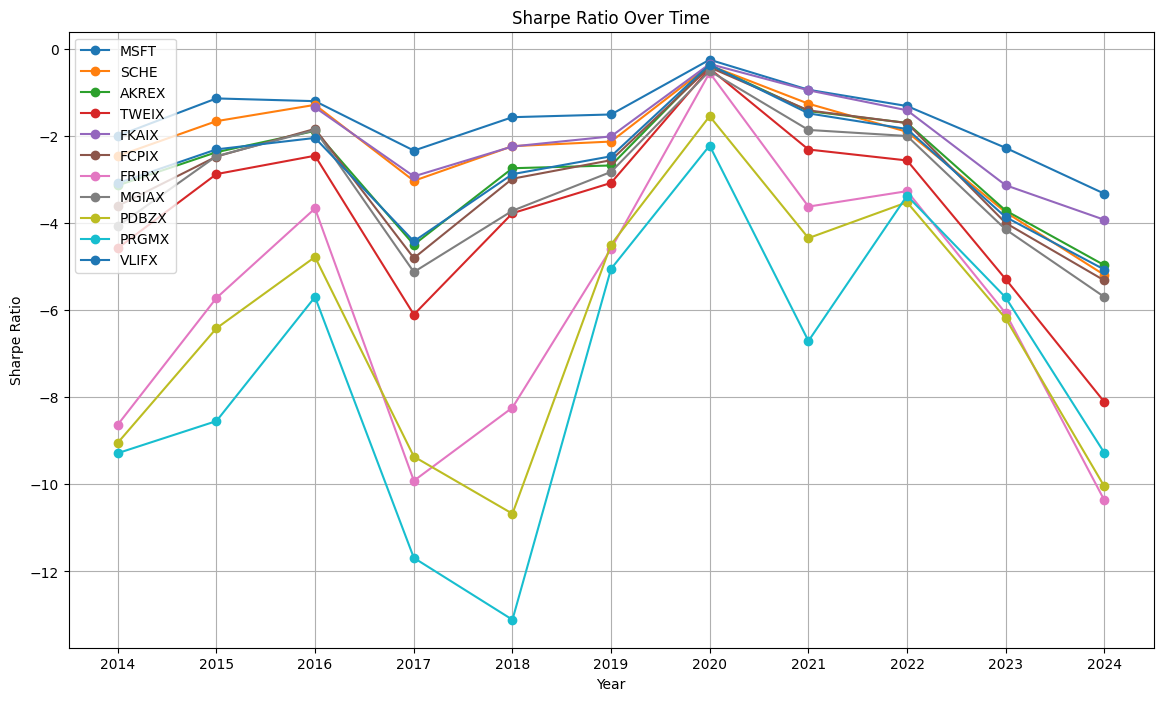

In [113]:
# Plotting function
def plot_metrics_over_time(df, title, ylabel):
    plt.figure(figsize=(14, 8))
    for column in df.columns:
        plt.plot(df.index, df[column], marker='o', label=column)
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel(ylabel)
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

# Plot Beta over time
plot_metrics_over_time(beta_df, 'Beta Over Time', 'Beta')

# Plot Alpha over time
plot_metrics_over_time(alpha_df, 'Alpha Over Time', 'Alpha')

# Plot Sharpe Ratio over time
plot_metrics_over_time(sharpe_df, 'Sharpe Ratio Over Time', 'Sharpe Ratio')

In [18]:
import plotly.express as px

import pandas as pd
import plotly.express as px

# Melt the DataFrames for use with Plotly
beta_melted = beta_df.reset_index().melt(id_vars='index', var_name='Investment', value_name='Beta')
alpha_melted = alpha_df.reset_index().melt(id_vars='index', var_name='Investment', value_name='Alpha')

# Rename the 'index' column to 'Date'
beta_melted.rename(columns={'index': 'Date'}, inplace=True)
alpha_melted.rename(columns={'index': 'Date'}, inplace=True)

# Combine the melted dataframes
combined_df = pd.merge(beta_melted, alpha_melted, on=['Date', 'Investment'])

# Create a long format DataFrame for Plotly
long_df = pd.melt(combined_df, id_vars=['Date', 'Investment'], value_vars=['Beta', 'Alpha'], var_name='Metric', value_name='Value')

# Plotly strip plot
fig = px.strip(long_df, x='Investment', y='Value', color='Metric', stripmode='overlay', 
               hover_data=['Date'], title='Alpha and Beta for Each Investment Over Time')

fig.update_layout(xaxis_title='Investment', yaxis_title='Value', legend_title='Metric', xaxis_tickangle=45)

fig.show()


KeyError: "The following id_vars or value_vars are not present in the DataFrame: ['index']"

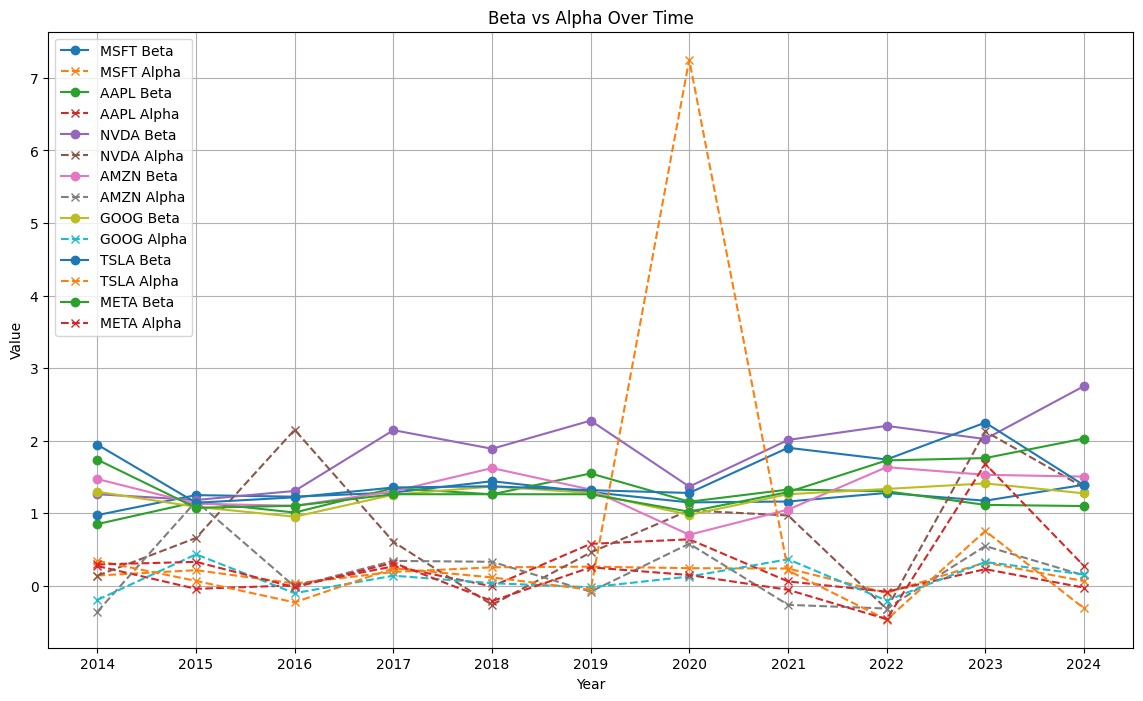

In [79]:

# Plot Beta vs Alpha
def plot_beta_vs_alpha(beta_df, alpha_df, title):
    plt.figure(figsize=(14, 8))
    for column in beta_df.columns:
        plt.plot(beta_df.index, beta_df[column], marker='o', label=f'{column} Beta')
        plt.plot(alpha_df.index, alpha_df[column], marker='x', linestyle='--', label=f'{column} Alpha')
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

plot_beta_vs_alpha(beta_df, alpha_df, 'Beta vs Alpha Over Time')

AttributeError: 'Toolkit' object has no attribute 'get_volatility'

We are going to look at some other key metrics for value investing:
Price to Earnings Ratio
-Market value of a stock compared to it's earnings.
-Challenge when picking 'hot' stocks is that the PE is going to be relatively large, the challenge is can that PE be sustained. Classic example from the past was at 300 Paypal PE was 3x its usual value
Price to Book Ratio
-Compares the value of a company to its book value/assets. Book value of 0.5 is good compared for value meaning underlying assets are twice the stock value
Debt to Equity Ratio
- Very industry dependent, industries with a lot of capital assets will have much higher debt to equity ratio
Free Cash Flow
- How efficient a company is in generating cash
PEG Ratio:
- A complete story adding the necessary growth metric into the PE number so you can evaluate PE in the context of growth.

In [80]:
foo = toolkit.ratios.collect_all_ratios()

In [88]:
print(foo.loc['AAPL'])

                                              2019          2020  \
Days of Inventory Outstanding                  NaN        8.7903   
Days of Sales Outstanding                      NaN       55.3447   
Operating Cycle                                NaN        64.135   
Days of Accounts Payable Outstanding           NaN       95.2889   
Cash Conversion Cycle                          NaN      -31.1539   
...                                            ...           ...   
EV-to-EBIT                                 19.9909       33.6429   
EV-to-EBITDA                               18.1183       30.4327   
EV-to-Operating-Cash-Flow                  19.9685       29.1765   
Tangible Asset Value                 90488000000.0 65339000000.0   
Net Current Asset Value              57101000000.0 38321000000.0   

                                              2021           2022  \
Days of Inventory Outstanding               9.1181         9.4097   
Days of Sales Outstanding                  44

In [94]:
foo_pe = toolkit.ratios.

AttributeError: 'Ratios' object has no attribute 'getgid'